#### General

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db_path= r'C:\PI\Proyecto Final\travel.sqlite'

In [3]:
conexion = sqlite3.connect(db_path)

In [4]:
df_tickets_flights= pd.read_sql_query("SELECT * FROM ticket_flights", conexion)

print(df_tickets_flights.head())

       ticket_no  flight_id fare_conditions  amount
0  0005432159776      30625        Business   42100
1  0005435212351      30625        Business   42100
2  0005435212386      30625        Business   42100
3  0005435212381      30625        Business   42100
4  0005432211370      30625        Business   42100


In [5]:
df_tickets_flights.columns

Index(['ticket_no', 'flight_id', 'fare_conditions', 'amount'], dtype='object')

In [16]:
Tickets_por_clase = df_tickets_flights.groupby('fare_conditions')['ticket_no'].count()
print(Tickets_por_clase)

fare_conditions
Business    107642
Comfort      17291
Economy     920793
Name: ticket_no, dtype: int64


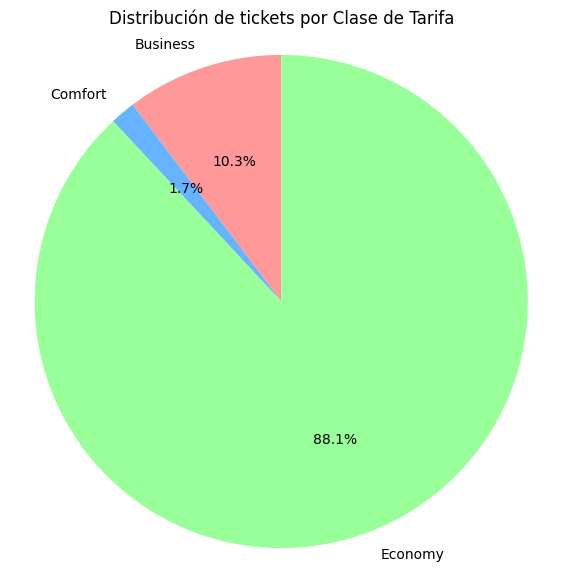

In [18]:
labels1 = Tickets_por_clase.index  # Las clases de tarifa (fare_conditions)
sizes1 = Tickets_por_clase.values  # Los ingresos totales por cada clase

plt.figure(figsize=(7, 7))  
plt.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])

plt.axis('equal')# Asegurar que el gráfico sea circular

plt.title('Distribución de tickets por Clase de Tarifa')
plt.show()

In [9]:
Ingresos_por_clase = df_tickets_flights.groupby('fare_conditions')['amount'].sum()
print(Ingresos_por_clase)

fare_conditions
Business     5505179600
Comfort       566116900
Economy     14695684400
Name: amount, dtype: int64


In [10]:
labels = Ingresos_por_clase.index  # Las clases de tarifa (fare_conditions)
sizes = Ingresos_por_clase.values  # Los ingresos totales por cada clase

plt.figure(figsize=(7, 7))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])

plt.axis('equal')# Asegurar que el gráfico sea circular

plt.title('Distribución de Ingresos por Clase de Tarifa')
plt.show()